1.

Proszę pobrać plik medicine.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować w jaki sposób sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) oraz jak wygląda poprawny podział zbioru. Proszę również przedstawić wyniki dla 5-8 różnych struktur sieci, wraz z oceną, która z nich najlepiej poradziła sobie z zadaniem klasyfikacji.

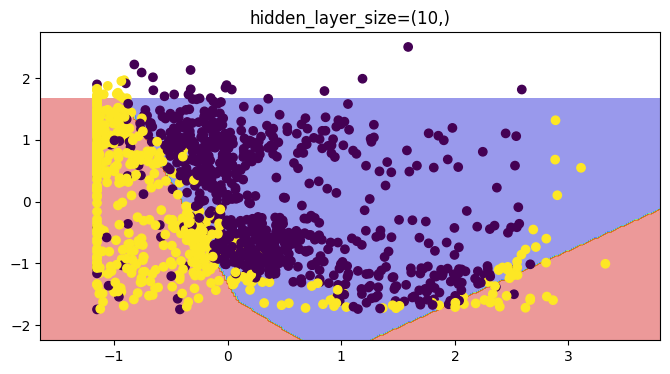

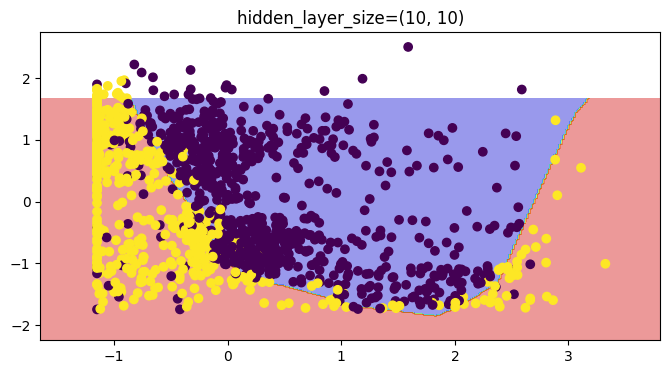

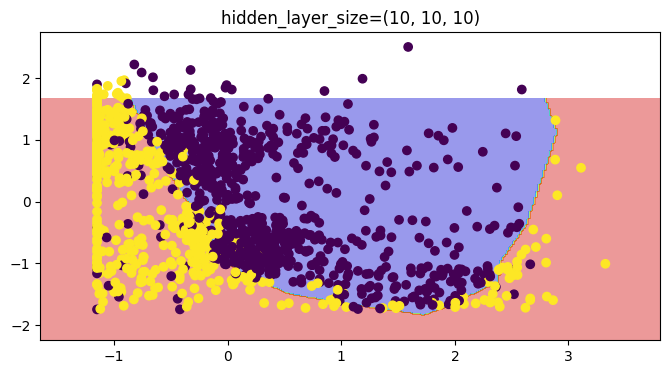

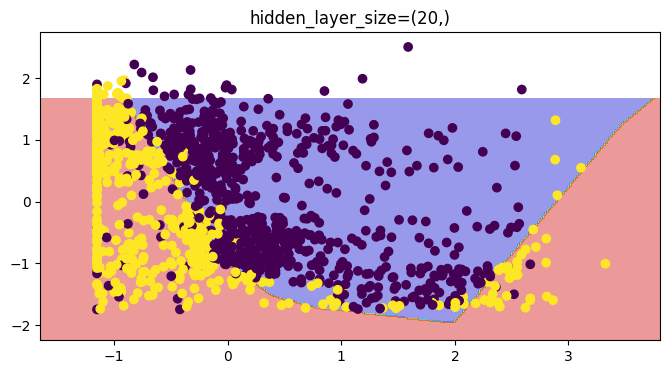

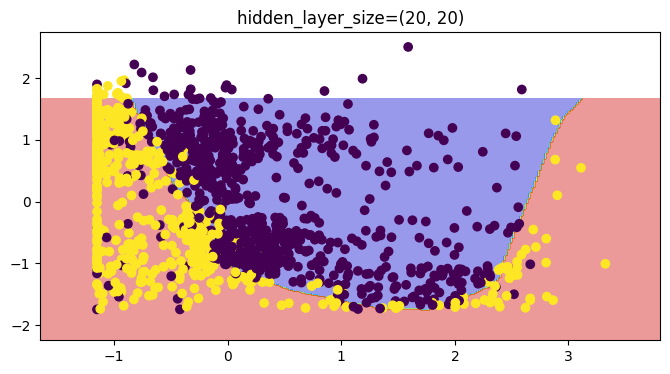

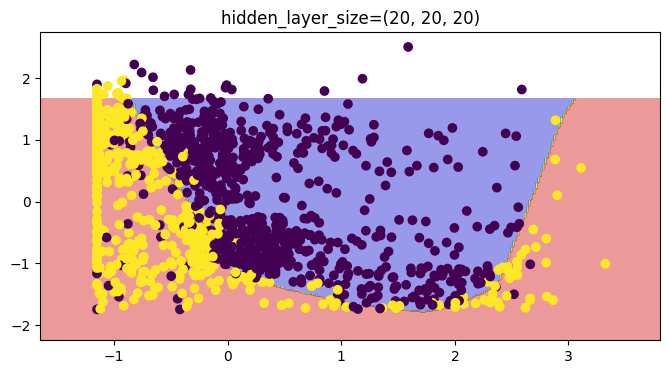

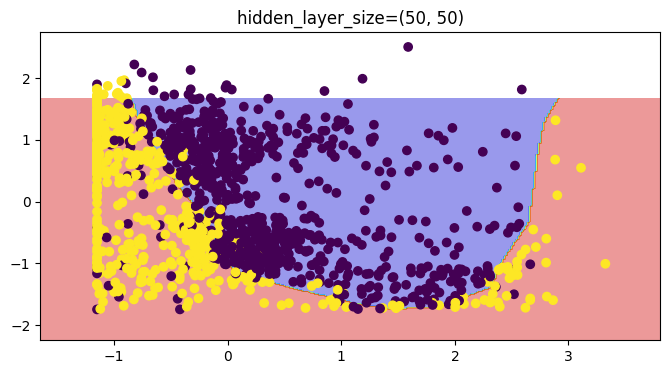

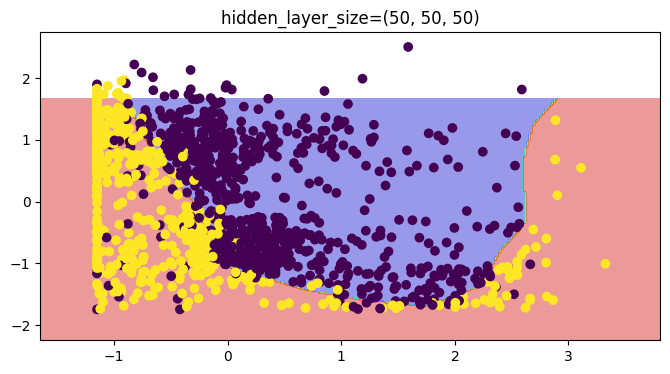

   accuracy hidden_layer_size
5  0.925926      (20, 20, 20)
1  0.918519          (10, 10)
4  0.918519          (20, 20)
6  0.918519          (50, 50)
2  0.914815      (10, 10, 10)
3  0.914815             (20,)
7  0.911111      (50, 50, 50)
0  0.896296             (10,)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df=pd.read_csv("sample_data/medicine.txt", sep=",")

hidden_layer_sizes = [(10,), (10,10), (10,10,10),(20,),(20,20),(20,20,20),(50,50),(50,50,50)]
normalizer = StandardScaler()
X = normalizer.fit_transform(df.iloc[:,0:2])
y=df.iloc[:,2]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
results=[]


for hidden_layer_size in hidden_layer_sizes:
  model = MLPClassifier(hidden_layer_sizes = hidden_layer_size, max_iter=2000)
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_pred,y_test)
  results.append({
      "accuracy": accuracy,
      "hidden_layer_size": hidden_layer_size
  })
  plt.figure(figsize=(8, 4))
  h=0.02
  x_min,x_max=X[:,0].min() - 0.5, X[:,0].max() + 0.5
  y_min,y_max=X[:,1].min() -0.5, X[:1].max() + 0.5
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z,cmap="jet",alpha=0.4)

  plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
  plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
  plt.title(f"hidden_layer_size={hidden_layer_size}")
  if len(hidden_layer_size)==3:
    plt.show()



results_df=pd.DataFrame(results)
print(results_df.sort_values(by='accuracy', ascending=False))













Model z jedną warstwą ukrytą (10 neuronów) osiągnął niższą dokładność w porównaniu do modeli z większą liczbą warstw i neuronów. Wskazuje to na ograniczenia prostych modeli w uchwyceniu złożoności danych.
Model z trzema warstwami ukrytymi (10, 10, 10) wykazał znaczną poprawę dokładności, sugerując, że dodanie więcej warstw ukrytych pozwala modelowi na lepsze uchwycenie złożonych zależności w danych.
Zwiększenie liczby neuronów w warstwach ukrytych (np., do konfiguracji (50, 50, 50)) nie zawsze prowadziło do znaczącej poprawy dokładności, co może wskazywać na punkt nasycenia, po którym dodatkowe złożoności modelu nie przekładają się na lepszą wydajność.

Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits() w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

digits=load_digits()

X=digits.images
y=digits.target


X_flat=X.reshape(X.shape[0],-1)

X_train, X_test, y_train, y_test=train_test_split(X_flat,y,test_size=0.2,random_state=42)

model = MLPClassifier(hidden_layer_sizes = (20,20), max_iter=2000)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("accuracy:", accuracy_score(y_test,y_pred))


accuracy: 0.9722222222222222


Na podstawie wyniku, możemy postawić tezę, iż klasyczna architektura poradziła sobie bardzo dobrze z rozpoznawaniem ręcznie pisanych cyfr i osiągnęła dokładność na imponującym poziomie 97%

Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek.

In [ ]:
from sklearn.metrics import accuracy_score

hidden_layer_sizes = [(10,10), (20,20), (50,50)]
activations = ['relu', 'tanh']
solvers = ['adam', 'sgd']
learning_rate_inits = [0.001, 0.01, 0.1]
max_iters = [3000, 3500]

results=[]
learning_rate='constant'

for hidden_layer_size in hidden_layer_sizes:
  for activation in activations:
    for solver in solvers:
      for max_iter in max_iters:
        for l_r in learning_rate_inits:
          if solver=='sgd':
            model=MLPClassifier(hidden_layer_sizes=hidden_layer_size,activation=activation,solver=solver,max_iter=max_iter,learning_rate=learning_rate, learning_rate_init=l_r, random_state=42)
            model.fit(X_train, y_train)
            y_pred=model.predict(X_test)
            accuracy=accuracy_score(y_test,y_pred)
            results.append({
                        'hidden_layer_sizes': hidden_layer_size,
                        'activation': activation,
                        'solver': solver,
                        'max_iter': max_iter,
                        'accuracy': accuracy,
                        'learning_rate': l_r
                    })
          else:
            model=MLPClassifier(hidden_layer_sizes=hidden_layer_size,activation=activation,solver=solver,max_iter=max_iter)
            model.fit(X_train, y_train)
            y_pred=model.predict(X_test)
            accuracy=accuracy_score(y_test,y_pred)
            results.append({
                        'hidden_layer_sizes': hidden_layer_size,
                        'activation': activation,
                        'solver': solver,
                        'max_iter': max_iter,
                        'accuracy': accuracy,
                        'learning_rate': None
                    })



results_df = pd.DataFrame(results)
print(results_df.sort_values(by='accuracy', ascending=False))


   hidden_layer_sizes activation solver  max_iter  accuracy  learning_rate
51           (50, 50)       relu   adam      3500  0.983333            NaN
67           (50, 50)       tanh    sgd      3000  0.977778           0.01
50           (50, 50)       relu   adam      3000  0.977778            NaN
48           (50, 50)       relu   adam      3000  0.977778            NaN
70           (50, 50)       tanh    sgd      3500  0.977778           0.01
..                ...        ...    ...       ...       ...            ...
35           (20, 20)       relu    sgd      3500  0.097222           0.10
11           (10, 10)       relu    sgd      3500  0.077778           0.10
8            (10, 10)       relu    sgd      3000  0.077778           0.10
56           (50, 50)       relu    sgd      3000  0.077778           0.10
59           (50, 50)       relu    sgd      3500  0.077778           0.10

[72 rows x 6 columns]


Najwyższą dokładność osiągnęły modele z architekturą (50, 50), niezależnie od wybranego solvera i funkcji aktywacji. Modele te osiągnęły dokładność na poziomie około 98,33% dla adam i około 97,78% dla sgd przy odpowiednim doborze parametrów, co sugeruje, że zwiększenie liczby neuronów w warstwach ukrytych może skutecznie przyczynić się do lepszego modelowania złożoności danych. Modele z funkcją aktywacji relu i tanh osiągnęły podobne wyniki przy zastosowaniu solvera adam, co sugeruje, że obie funkcje aktywacji mogą być skuteczne w kontekście tego zadania klasyfikacji. Jednak w przypadku solvera sgd, wydaje się, że konfiguracje z tanh osiągnęły lekko lepsze wyniki niż z relu, co może wskazywać na to, że tanh jest nieco bardziej odporny na problemy związane z wolniejszą zbieżnością. Najlepsze wyniki uzyskano przy użyciu solvera adam, gdyż jest on powszechnie uznawany za jeden z bardziej optymalnych solverów. Widzimy też, iż w przypadku solvera sgd, mniejszy learning rate polepsza znacząco performance sieci i czyni ją bardziej dokładną

Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru (uwaga, wymagana jest zamiana etykiet tekstowych w ostatniej kolumnie na liczbowe - można je zamienić ręcznie albo przy użyciu takich narzędzi jak https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html, należy jednak pamiętać, że nie musi on ułożyć tych etykiet po kolei). Warto zauważyć, że liczności różnych klas wewnątrz zbioru są bardzo nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego). Czy trafność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

In [ ]:
import requests
from io import StringIO
from sklearn.preprocessing import LabelEncoder, StandardScaler
import time
from sklearn.metrics import confusion_matrix


data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
response = requests.get(data_url)
data = response.text

df = pd.read_csv(StringIO(data), sep='\s+', header=None)
le = LabelEncoder()
le.fit(df[9])
df.iloc[:,-1] = le.transform(df.iloc[:,-1])

X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

my_list=[0 for _ in range(10)]

for value in y:
  my_list[value]+=1
# print(my_list)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

hidden_layer_sizes = [(20,20), (50,50)]
activations = ['relu']
solvers = ['adam','sgd']
max_iters = [3000, 3500]

results=[]

for hidden_layer_size in hidden_layer_sizes:
  for activation in activations:
    for solver in solvers:
      for max_iter in max_iters:
        model=MLPClassifier(hidden_layer_sizes=hidden_layer_size,activation=activation,solver=solver,max_iter=max_iter)
        begin=time.time()
        model.fit(X_train, y_train)
        end=time.time()
        fit_time=end-begin

        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test,y_pred)
        results.append({
                    'hidden_layer_sizes': hidden_layer_size,
                    'activation': activation,
                    'solver': solver,
                    'max_iter': max_iter,
                    'accuracy': accuracy,
                    'fit_time': fit_time,
                    'y_pred': y_pred
                })

results_df=pd.DataFrame(results)
print(results_df.sort_values(by='accuracy', ascending=False))

for row in results_df.values:
  if row[4]>0.6:
    conf_mat=confusion_matrix(y_test,row[6])
    print(conf_mat)









<ipython-input-21-9f17559b5cf6>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1] = le.transform(df.iloc[:,-1])


  hidden_layer_sizes activation solver  max_iter  accuracy   fit_time  \
2           (20, 20)       relu    sgd      3000  0.606061   5.141296   
3           (20, 20)       relu    sgd      3500  0.606061   6.106937   
6           (50, 50)       relu    sgd      3000  0.602694  19.498772   
7           (50, 50)       relu    sgd      3500  0.595960  27.219864   
0           (20, 20)       relu   adam      3000  0.589226   4.890236   
1           (20, 20)       relu   adam      3500  0.572391   6.894830   
4           (50, 50)       relu   adam      3000  0.545455  17.531729   
5           (50, 50)       relu   adam      3500  0.515152  13.898590   

                                              y_pred  
2  [6, 6, 5, 0, 5, 6, 0, 0, 0, 5, 5, 6, 7, 7, 7, ...  
3  [6, 6, 5, 0, 5, 6, 0, 0, 0, 5, 5, 6, 7, 7, 7, ...  
6  [6, 6, 5, 0, 5, 6, 0, 0, 0, 5, 5, 6, 0, 7, 7, ...  
7  [6, 6, 5, 0, 5, 6, 0, 0, 0, 5, 5, 6, 0, 7, 7, ...  
0  [6, 6, 5, 0, 5, 6, 0, 0, 0, 5, 5, 6, 7, 7, 0, ...  
1  [0, 6, 5,

Modele z większą liczbą neuronów w warstwach ukrytych (50,50) osiągnęły porównywalne wyniki do modeli z mniejszą liczbą neuronów (20,20), co sugeruje, że zwiększenie liczby neuronów nie zawsze prowadzi do znaczącej poprawy dokładności w tym zadaniu klasyfikacji. Ponadto zwiększenie liczby iteracji z 3000 do 3500 nie miało znaczącego wpływu na dokładność modeli, co może sugerować, że modele konwergowały już przed osiągnięciem 3000 iteracji. Modele z większą liczbą neuronów i większą liczbą iteracji wymagały więcej czasu na trening. Jest to szczególnie widoczne w przypadku solvera sgd, gdzie czas treningu znacząco wzrósł w porównaniu z adam. Macierze pomyłek dla modeli osiągających dokładność powyżej 60% pokazują, że modele mają trudności z klasyfikacją pewnych klas, co prawdopodbnie może wynikać z nieproporcjonalnej liczby próbek (lista stworzona na potrzebne pokazania tego w zadaniu). Wbrew pozorom, najbardziej efektywnym solverem w tym zadaniu okazał się byc sgd, a dokładność na poziomie 50% nie jest do końca satysfakcjonująca, gdyż dostosowując odpowiednio architekturę udąło się osiągnąć nawet ponad 60%.